# Класификация оцелелите от Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Overview

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Dictionary


| Variable      | Definition        | Key                       |
| ------------- |:-----------------:| -------------------------:|
| survival      | Survival          | 0 = No, 1 = Yes           |
| pclass        | Ticket class      | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex           | Sex               |                           |
| age           | Age in years      | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                          |
| sibsp         | # of siblings / spouses aboard the Titanic      | Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored)                          |
| parch         | # of parents / children aboard the Titanic      | Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.                          |
| ticket        | Ticket number     |                           |
| fare          | Passenger fare    |                           |
| cabin         | Cabin number      |                           |
| embarked      | Port of Embarkation      | C = Cherbourg, Q = Queenstown, S = Southampton |


## Четене на данните


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Reading all from the csv
passengers = pd.read_csv('data/train.csv')

# Show the top 5 rows
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Show the shape of dataset
passengers.shape

(891, 12)

In [3]:
# Explain the different values of the attributes
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Check data types

passengers.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Check for unique classes - 2 are expected

passengers['Survived'].unique()

array([0, 1])

In [7]:
# Check the counts for the classes

passengers.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

Виждаме, че първа класа са били най-редовни откъм настаняване и отчитане, докато за голяма част от трета класа не се знае почти нищо.

## Feature Engineering

### Анализ на липсващите стойности

In [8]:
# Check for null values

passengers.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

Тук може се забелязват липсващи данни.
Съответно те са:

| Variable      | Nulls        |
| ------------- |:------------:|
| Embarked      | 2            |
| Age           | 177          |
| Cabin         | 687          |

Данните за Embarked са пренебрижимо малко на фона на общия брой данни. Затова, не би трябвало да е проблем да изберем случайна стойност от (S, Q, C) за тях. Те няма да имат особено значение за тренираните алгоритми. Затова просто ще ги заместим със най-честата стойност за съответната класа, която в случая е само първа.

In [9]:
passengers[passengers["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
passengers[passengers["Pclass"] == 1]["Embarked"].value_counts()
passengers["Embarked"] = passengers["Embarked"].fillna("S")

Данните за Cabin са най-много. За тях обаче, тъй като съм гледал филма и си спомням че трета класа ги бяха натрупали най-долу, а тези които бяха първа се разхождаха по дека на кораба, можем да направим хипотезата, че номера на кабината ще се дава като функция, на която един входовете е класата на пътника. Освен това кабините са групирани по първи букви, които съответно имат някакво значение. Проверяваме тази хипотеза.

In [11]:
passengers[passengers["Cabin"].isnull()].groupby(['Pclass']).size()

Pclass
1     40
2    168
3    479
dtype: int64

Подобна заявка бихме искали да направим и за Age колоната.


In [12]:
passengers[passengers["Age"].isnull()].groupby(['Pclass']).size()

Pclass
1     30
2     11
3    136
dtype: int64

Извод: най-много от детайлната информация липсва за представилите на третата класа.

### Синтез на features

Като първа стъпка във feature engineering-а, ще отделим първата буква от Cabin колоната. Това би трябвало да има смисъла на етаж в хотел, т.е. тази буква ще има приоритет, който бихме искали да кодираме.

In [13]:
import re
import math

def cabin_prefix(row):
    if isinstance(row["Cabin"], float):
        return "?"
    return re.match("[A-Z]*", row["Cabin"])[0]

passengers["cabin_prefix"] = passengers.apply (lambda row: cabin_prefix(row), axis=1)
passengers.groupby(['Pclass', 'cabin_prefix']).size()

Pclass  cabin_prefix
1       ?                40
        A                15
        B                47
        C                59
        D                29
        E                25
        T                 1
2       ?               168
        D                 4
        E                 4
        F                 8
3       ?               479
        E                 3
        F                 5
        G                 4
dtype: int64

Забележка: проверено е, че за тестовото множество имаме същите букви.

От резултатите по-горе се вижда, че A е най-големия лукс, докато G е за най-бедните. Съответно задаваме и по този начин приоритета на cabin_prefix.

In [14]:
def cabin_prefix_code(row):
    if isinstance(row["cabin_prefix"], float):
        return row["cabin_prefix"]
    if row["cabin_prefix"] == "?":
        return 0
    if row["cabin_prefix"] == "T":
        return ord("A")
    return ord(row["cabin_prefix"])
    
    
passengers["cabin_prefix"] = passengers.apply(lambda row: cabin_prefix_code(row), axis=1)
passengers.groupby("cabin_prefix").size()

cabin_prefix
0     687
65     16
66     47
67     59
68     33
69     32
70     13
71      4
dtype: int64

Забележка: Превръщаме "етаж" Т директно в А, понеже предполагаме, че е бил зададен на някоя важна личност, напр. на капитана или на контесата (Countess).

За липсващите стойности в колоната Age най-смисленото, което бихме направили е, да направим средно аритметично. Обаче имаме различни типове пътници - деца, майки, госпожици, господа и прочие. За целта ще искаме да по някакъв начин да си маркираме тази информация и да правим средното за тези стойности. За целта ще кодираме различните титли в имената на пътниците.

In [15]:
def find_title(row, title_list):
    for title in title_list:
        if title in row["Name"]:
            return title
    return "?"

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

passengers["title"] = passengers.apply(lambda row: find_title(row, title_list), axis=1)
passengers.groupby("title").size()

title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Major         2
Master       40
Miss        180
Mlle          1
Mme           1
Mr          518
Mrs         129
Ms            1
Rev           6
dtype: int64

Получените класове са твърде много. Това, което можем да направим е да изберем класовете "Mr", "Miss", "Mrs" и "Master" като такива. Освен това, "Mr" и "Master" са само мъжки, а "Miss" и "Mrs" са само женски.

In [16]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

passengers['title'] = passengers.apply(lambda row: replace_titles(row), axis=1)
passengers.groupby(["Sex", "title"]).size()

Sex     title 
female  Miss      182
        Mrs       132
male    Master     40
        Mr        537
dtype: int64

Можем да приложим кодирането на title:

| Gender        | Title         | New Gender    | New Gender    |
| ------------- |:-------------:| -------------:| -------------:|
| female        | Miss          | 0             | 0             |
| female        | Mrs           | 0             | 1             |
| male          | Mr            | 1             | 0             |
| male          | Master        | 1             | 1             |

Това съответства на one-hot encoding по полетата (Sex, Title), което се очаква да предсатави инфромацията по много хубав начин за класификаторите.

In [17]:
convert_table = { 
                    "title": {"Miss": 0, "Mrs": 1, "Mr": 0, "Master": 1},
                    "Sex":   {"female": 0, "male": 1},                  
                }

passengers.replace(convert_table, inplace=True)
passengers.groupby(["Sex", "title"]).size()

Sex  title
0    0        182
     1        132
1    0        537
     1         40
dtype: int64

### Линейни комбинации
Сравнително лесно можем да създадем нови характеристики като линейни комбинации на дадените такива.
Това например би оказало добро влияние върху decision tree модели.

#### Family Size
Четейки форумите в Kaggle, някои хора са взели в предвид размера на семейството на даден човек като сумата на атрибутите "Sibsp" и "Parch". Може би хората, които са пътували сами са се справили по-добре? Или ако са имали семейство, са рискували живота си за да се погрижат за тях или дори са им предоставили мястото си в спасителната лодка.

In [18]:
# Creating new family_size column

passengers['family_size'] = passengers['SibSp'] + passengers['Parch']
passengers.groupby("family_size").size()

family_size
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
dtype: int64

Съответно, можем да направим one-hot encoding, като питаме въпроса:

Колко хора са имали член на семейството си на борда.

In [19]:
def with_family(row):
    if row["family_size"] == 0:
        return 0
    return 1

passengers['with_family'] = passengers.apply(lambda row: with_family(row), axis=1)
passengers.groupby("with_family").size()

with_family
0    537
1    354
dtype: int64

#### Age * Class
Това е просто комбинация между age и class.

In [20]:
passengers['age_class'] = passengers['Age'] * passengers['Pclass']

#### Is_child, is_responsible, is_old, is_adult

Това са просто проверки по възрастта на съответния пътник.

Забелжка: Правим го като one-hot encoding.

In [20]:
def age_class(row):
    if row["Age"] < 16:
        row["is_child"] = 1
    elif row["Age"] < 21:
        row["is_responsible"] = 1
    elif row["Age"] < 60:
        row["is_adult"] = 1
    elif row["Age"] >= 60:
        row["is_old"] = 1
    else:
        row["age_unknown"] = 1
    return row

passengers["is_child"] = 0
passengers["is_responsible"] = 0
passengers["is_adult"] = 0
passengers["is_old"] = 0
passengers["age_unknown"] = 0

passengers = passengers.apply(lambda row: age_class(row), axis=1)

print(passengers.groupby(["is_child"]).size())
print(passengers.groupby(["is_responsible"]).size())
print(passengers.groupby(["is_adult"]).size())
print(passengers.groupby(["is_old"]).size())
print(passengers.groupby(["age_unknown"]).size())

is_child
0    808
1     83
dtype: int64
is_responsible
0    794
1     97
dtype: int64
is_adult
0    383
1    508
dtype: int64
is_old
0    865
1     26
dtype: int64
age_unknown
0    714
1    177
dtype: int64


### Преглед на атрибутите

In [21]:
# Explain the different values of the attributes

passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_prefix,title,family_size,with_family,is_child,is_responsible,is_adult,is_old,age_unknown
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,15.421998,0.193042,0.904602,0.397306,0.093154,0.108866,0.570146,0.029181,0.198653
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,28.325502,0.394907,1.613459,0.489615,0.290811,0.311647,0.495333,0.168407,0.399210
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,71.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
    # Check data types

passengers.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
cabin_prefix        int64
title               int64
family_size         int64
with_family         int64
is_child            int64
is_responsible      int64
is_adult            int64
is_old              int64
age_unknown         int64
dtype: object

## Анализ на тенденциите
### Семейства по класи
Колко са били семействата и единичните хора по различните класи.


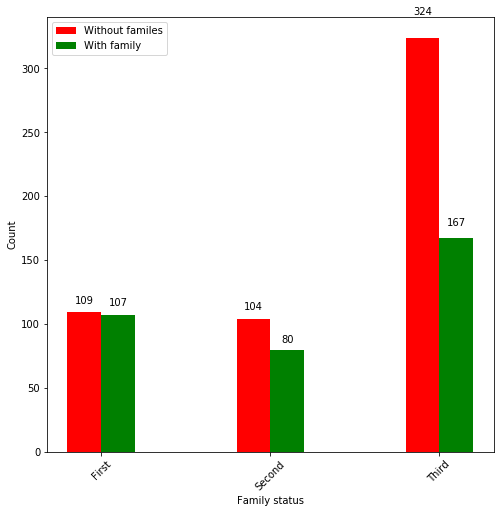

In [23]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


classes = [1, 2, 3]
classes_names = ["", "First", "Second", "Third"]

families = passengers[passengers["with_family"]==1]
no_families = passengers[passengers["with_family"]==0]

nvalues = []
pvalues = []
cvalues = []

for c in classes:
    nvalues.append(len(no_families[no_families["Pclass"]==c]))
    pvalues.append(len(families[families["Pclass"]==c]))
    cvalues.append(classes_names[c])

N = len(pvalues)
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots(figsize=(8,8))

nrects = ax.bar(ind, nvalues, width, color='r')
prects = ax.bar(ind + width, pvalues, width, color='g')

plt.xticks(rotation=45)
ax.set_ylabel('Count')
ax.set_xlabel("Family status")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(cvalues)
ax.legend(('Without familes', 'With family'))

autolabel(nrects)
autolabel(prects)

plt.show()

### Качване на пътниците по класа

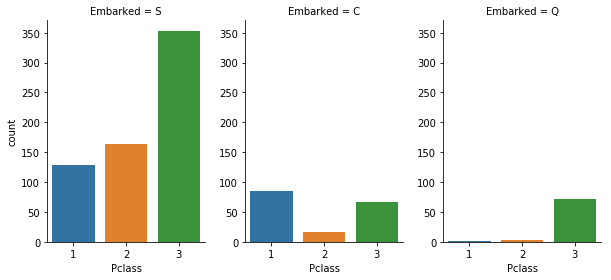

In [24]:
import seaborn as sns

sns.factorplot(x="Pclass", col="Embarked", data=passengers, kind="count",size=4, aspect=.7)
plt.show()

Виждаме, че от трета класа са качвани на всички пристанища, от първа - Southampton (повече от половината) и от Cherbourg, а от втора - само от първото (Southampton).

### Възрастово отношение по класи

Колко представители на рзличните възрастовави категории е имало от различните класи.
За целта ще използваме ново поле - age_index, което се явява битова маска на въведените вече класове за възраст.

In [25]:
# Add age_index column

def age_index(row):
    return row["is_child"] + 2 * row["is_responsible"] + 4 * row["is_adult"] + 8 * row["is_old"]

passengers["age_index"] = passengers.apply (lambda row: age_index(row), axis=1)

passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_prefix,title,family_size,with_family,is_child,is_responsible,is_adult,is_old,age_unknown,age_index
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,15.421998,0.193042,0.904602,0.397306,0.093154,0.108866,0.570146,0.029181,0.198653,2.824916
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,28.325502,0.394907,1.613459,0.489615,0.290811,0.311647,0.495333,0.168407,0.399210,1.882112
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,71.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


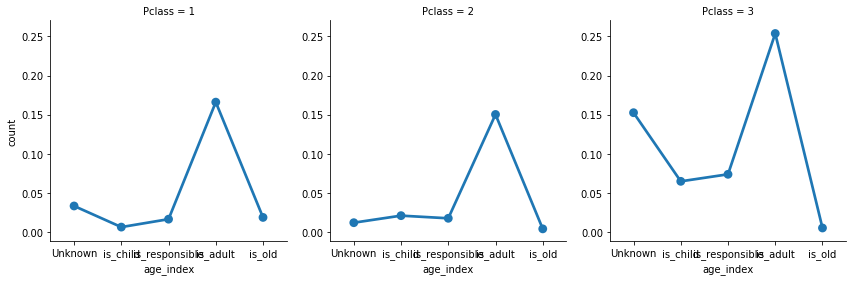

In [26]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Aggregate and normalize counts of different plcass and age_index

age_index_counts = (passengers
    .groupby(["Pclass", 'age_index'])["Pclass", 'age_index']
    .size()
    .reset_index(name="count"))

age_index_counts["count"] /= passengers.shape[0]

g = sns.factorplot(data=age_index_counts, x="age_index", y="count", col="Pclass")
g.set(xticklabels=["Unknown", "is_child", "is_responsible", "is_adult", "is_old"])

plt.show()

От направения анализ се вижда, че най-много пътници с неизвестна възраст са били в трета класа.

Освен това, най-много деца и юноши са били също в нея - повече от три пъти спрямо другите две по-горни класи.  

###  Спасяване по пътническа класа
Как са спасявани различните представлтели на пътническите класи - is_child, is_responsible, is_adult, is_old

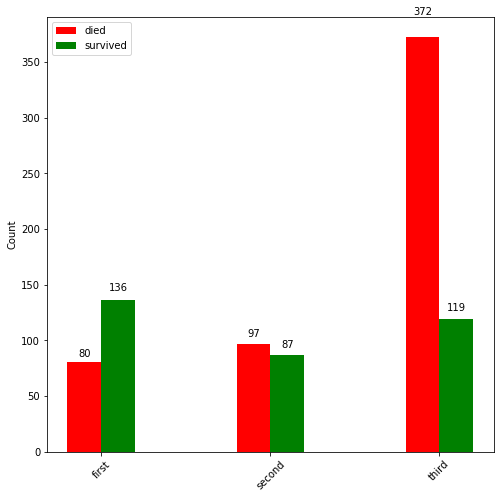

In [27]:
# Plot the age groups by passenger class

survived = passengers[passengers["Survived"] == 1]
died = passengers[passengers["Survived"] == 0]

stat = passengers.groupby(["Pclass", "Survived"]).size()

dvalues = [stat[1][0], stat[2][0], stat[3][0]]
svalues = [stat[1][1], stat[2][1], stat[3][1]]

N = 3
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots(figsize=(8,8))

rects1 = ax.bar(ind, dvalues, width, color='r')
autolabel(rects1)

rects2 = ax.bar(ind+width, svalues, width, color='g')
autolabel(rects2)

plt.xticks(rotation=45)
ax.set_ylabel('Count')
ax.set_xticks(ind+0.5 * width)
ax.set_xticklabels(("first", "second", "third"))
ax.legend(('died', 'survived'))
plt.show()

От графиката виждаме, че първа класа е била с приоритет, а втора класа е била наполовина спасена. Трета класа изобщо не е била зачитана.

###  Спасяване по възрастова класа
Как са спасявани различните представлтели на възростовите класи - is_child, is_responsible, is_adult, is_old

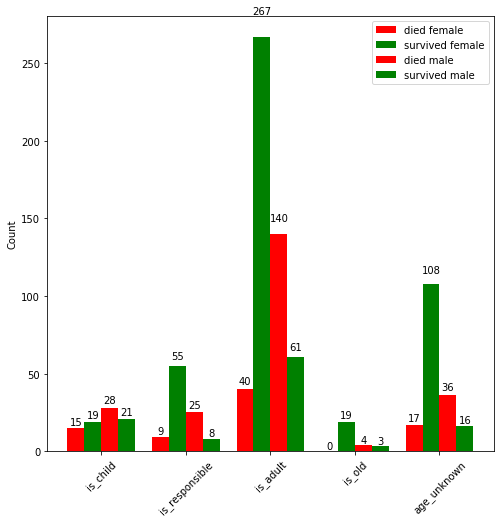

In [28]:
# Plot the age groups by surviving and sex

survived = passengers[passengers["Survived"] == 1]
died = passengers[passengers["Survived"] == 0]

fields = ["is_child", "is_responsible", "is_adult", "is_old", "age_unknown"]

svalues = {
    0: {
        0: [],
        1: []
    },
    1: {
        0: [],
        1: []
    }
}

for field in fields:
    stat = passengers[passengers[field] == 1].groupby(["Survived", "Sex"]).size()
    svalues[0][0].append(stat[0].get(0,0))
    svalues[0][1].append(stat[0].get(1,0))
    svalues[1][0].append(stat[1].get(0,0))
    svalues[1][1].append(stat[1].get(1,0))

N = 5
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots(figsize=(8,8))
    
rects1 = ax.bar(ind, svalues[0][0], width, color='r')
autolabel(rects1)

rects2 = ax.bar(ind+width, svalues[0][1], width, color='g')
autolabel(rects2)

rects3 = ax.bar(ind+2*width, svalues[1][0], width, color='r')
autolabel(rects3)

rects4 = ax.bar(ind+3*width, svalues[1][1], width, color='g')
autolabel(rects4)

plt.xticks(rotation=45)
ax.set_ylabel('Count')
ax.set_xticks(ind+1.5*width)
ax.set_xticklabels(fields)
ax.legend(('died female', 'survived female', 'died male', 'survived male'))

plt.show()

От графиката виждаме, че жените са били спасявани с приоритет.
Освен това всички жени на възраст са били спасени.

### Подготовка на липсващите възрасти

За да можем да проведем класификация на кои са спасявани, трябва да можем да задаем стойности на възрастите.
За целта можем да подходим по следните начини:
  * Регресия, с която да предскажем стойностите - трудно и не е ясно колко е точно
  * Заместваме с медианта, грубо, но реално не изместваме статистическото разпределение,

Подхождаме по втория начин:

In [30]:
medians = {
    1: passengers[passengers["Pclass"] == 1]["Age"].median(),
    2: passengers[passengers["Pclass"] == 2]["Age"].median(),
    3: passengers[passengers["Pclass"] == 3]["Age"].median()
}

def predict_age(row):
    if math.isnan(row["Age"]):
        return medians[row["Pclass"]]
    return row["Age"]
    
passengers["Age"] = passengers.apply (lambda row: predict_age(row), axis=1)
passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_prefix,title,family_size,with_family,is_child,is_responsible,is_adult,is_old,age_unknown,age_index
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,15.421998,0.193042,0.904602,0.397306,0.093154,0.108866,0.570146,0.029181,0.198653,2.824916
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,28.325502,0.394907,1.613459,0.489615,0.290811,0.311647,0.495333,0.168407,0.399210,1.882112
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,71.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


### Подготовка за класифициране

За процеса на класификация, ще изберем следните характеристики, по които да предсказваме пътниците дали са били спасени или не:

 * Pclass
 * Fare
 * cabin_prefix
 * title
 * family_size
 * with_family
 * Age
 * is_child
 * is_responsible
 * is_adult
 * is_old
 * age_unknown
 
Следните характеристики се нуждаят, обаче, преди това да бъдат нормализирани:
 * Pclass
 * Fare
 * cabin_prefix
 * family_size
 * Age

За целта, тези полета просто ще бъдат разделени с най-голямата стойност, която има за съответното поле. (Бихме могли да разглеждаме усредняването спрямо различни полета, както направихме за липсващата възраст спрямо пътническата класа, но това не би трябвало да е от голямо значение за класификацията).

In [31]:
passengers["pclass_norm"] = passengers["Pclass"] / passengers["Pclass"].max()
passengers["fare_norm"] = passengers["Fare"] / passengers["Fare"].max()
passengers["cabin_prefix_norm"] = passengers["cabin_prefix"] / passengers["cabin_prefix"].max()
passengers["family_size_norm"] = passengers["family_size"] / passengers["family_size"].max()
passengers["age_norm"] = passengers["Age"] / passengers["Age"].max()

In [32]:
from sklearn.model_selection import train_test_split
X = passengers.drop('Survived', axis=1)
y = passengers['Survived']

fields = ["pclass_norm", "fare_norm", 
          "cabin_prefix_norm", 
          "title", "family_size_norm", "with_family", 
          "age_norm", 
          "is_child", "is_responsible", "is_adult", "is_old", "age_unknown"]
X = X[fields]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Класифициране на спасените и неспасени пътници

За целта ще използваме следните класификатори:
  * Наивен Бейсов класификатор
  * Логистична регресия
  * Decision tree
  * Random forest
  * kNN
  * Linear Support vector machine
  

In [33]:
import random
random.seed(1)

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

keys = []
scores = []
models = {
            'Naive Bayes': GaussianNB(),
            'Logistic Regression': LogisticRegression(), 
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(n_estimators=30), 
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
            'Linear SVM': SVC(kernel='rbf', gamma=.10, C=1.0)
         }


for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)


Results for: Naive Bayes

[[125  29]
 [ 45  69]]
             precision    recall  f1-score   support

          0       0.74      0.81      0.77       154
          1       0.70      0.61      0.65       114

avg / total       0.72      0.72      0.72       268

0.723880597015



Results for: Logistic Regression

[[130  24]
 [ 51  63]]
             precision    recall  f1-score   support

          0       0.72      0.84      0.78       154
          1       0.72      0.55      0.63       114

avg / total       0.72      0.72      0.71       268

0.720149253731



Results for: Decision Tree

[[126  28]
 [ 40  74]]
             precision    recall  f1-score   support

          0       0.76      0.82      0.79       154
          1       0.73      0.65      0.69       114

avg / total       0.74      0.75      0.74       268

0.746268656716



Results for: Random Forest

[[129  25]
 [ 42  72]]
             precision    recall  f1-score   support

          0       0.75      0.84      0

Използваме наивния Бейсов класификатор като груба оценка за това кои алгоритми се представят добре. Той е модел. който се интересува само от входното разпределнение, като не работи с никакви метапараметри, които бихме могли да оптимираме, т.е. грубо избираме моделите, които се представят по-добре от него. Това са:

  * Логистична регресия
  * Decision tree
  * Random forest

Тези модели поддържат работа с метапараметри, които бихме могли да оптимираме. За целта има няколко подхода:
  * Търсене с изчерпване (GridSearchCV)
  * Случайностно търсене със селекция на най-добрия (RandomizedSearchCV)
  * Генетични алгоритми

Гентичните алгоритми представляват нещо като втория вариант, само че работим с множество от текущи комибнации на метапараметрите, които смесваме по даден начин. За целта на упражнението, ползваме следният пакет:

https://github.com/rsteca/sklearn-deap


## Избор на метапараметрите на моделите

### Логистична регресия

За логистичната регресия, бихме могли да направим изследването с хиперпараметъра C:

In [128]:
from sklearn.model_selection import StratifiedKFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV

paramgrid = {
    "C"     : np.logspace(-15, 15, num=40, base=10),
    "class_weight": ["balanced", None]
}

cv = EvolutionaryAlgorithmSearchCV(estimator=LogisticRegression(),
                                   params=paramgrid,
                                   scoring="accuracy",
                                   cv=StratifiedKFold(n_splits=5),
                                   verbose=100,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)

cv.fit(X, y)

Types [2, 1] and maxint [39, 1] detected


/home/hristo/cm/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/hristo/cm/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[CV] C=1.4251026703e-09, class_weight=balanced .......................
[CV]  C=1.4251026703e-09, class_weight=balanced, score=0.5754189944134078, total=   0.0s
[CV] C=3455107.29459, class_weight=None ..............................
[CV] C=142510267030.0, class_weight=balanced .........................
[CV] C=1.4251026703e-09, class_weight=balanced .......................
[CV] C=1e-05, class_weight=balanced ..................................
[CV]  C=1.4251026703e-09, class_weight=balanced, score=0.664804469273743, total=   0.0s
[CV]  C=142510267030.0, class_weight=balanced, score=0.664804469273743, total=   0.0s
[CV]  C=1e-05, class_weight=balanced, score=0.5754189944134078, total=   0.0s
--- Evolve in 80 possible combinations ---
[CV] C=1.4251026703e-09, class_weight=balanced .......................
[CV] C=142510267030.0, class_weight=balanced .........................
[CV]  C=3455107.29459, class_weight=None, score=0.6871508379888268, total=   0.0s
[CV] C=1e-05, class_weight=balanced .

[CV]  C=701703828.67, class_weight=None, score=0.8192090395480226, total=   0.0s
[CV] C=587801.607227, class_weight=balanced ..........................
[CV] C=119377664.171, class_weight=None ..............................
[CV] C=2.42446201708, class_weight=balanced ..........................
[CV] C=2894.26612472, class_weight=None ..............................
[CV]  C=587801.607227, class_weight=balanced, score=0.7696629213483146, total=   0.0s
[CV]  C=2.42446201708, class_weight=balanced, score=0.7640449438202247, total=   0.0s
[CV]  C=2894.26612472, class_weight=None, score=0.7752808988764045, total=   0.0s
[CV]  C=119377664.171, class_weight=None, score=0.6871508379888268, total=   0.0s
[CV] C=587801.607227, class_weight=balanced ..........................
[CV] C=2.42446201708, class_weight=balanced ..........................
[CV]  C=587801.607227, class_weight=balanced, score=0.7853107344632768, total=   0.0s
[CV] C=2894.26612472, class_weight=None ..............................


[CV]  C=4124626382.9, class_weight=balanced, score=0.7150837988826816, total=   0.0s
[CV] C=837677640068.0, class_weight=balanced .........................
[CV] C=2.89426612472e+13, class_weight=balanced ......................
[CV] C=100000.0, class_weight=balanced ...............................
[CV]  C=2.89426612472e+13, class_weight=balanced, score=0.664804469273743, total=   0.0s
[CV]  C=837677640068.0, class_weight=balanced, score=0.7808988764044944, total=   0.0s
[CV] C=4124626382.9, class_weight=balanced ...........................
[CV] C=2.89426612472e+13, class_weight=balanced ......................
[CV]  C=100000.0, class_weight=balanced, score=0.7808988764044944, total=   0.0s
[CV] C=837677640068.0, class_weight=balanced .........................
[CV]  C=4124626382.9, class_weight=balanced, score=0.7808988764044944, total=   0.0s
[CV]  C=2.89426612472e+13, class_weight=balanced, score=0.7150837988826816, total=   0.0s
[CV] C=4124626382.9, class_weight=balanced ..............

[CV]  C=2.89426612472e-07, class_weight=None, score=0.6145251396648045, total=   0.0s
[CV] C=17012.5427985, class_weight=None ..............................
[CV] C=4.92388263171e-08, class_weight=None ..........................
[CV] C=2.89426612472e-07, class_weight=None ..........................
[CV]  C=5.87801607227e-05, class_weight=None, score=0.615819209039548, total=   0.0s
[CV]  C=17012.5427985, class_weight=None, score=0.7640449438202247, total=   0.0s
[CV]  C=4.92388263171e-08, class_weight=None, score=0.6145251396648045, total=   0.0s
[CV]  C=2.89426612472e-07, class_weight=None, score=0.6145251396648045, total=   0.0s
[CV] C=17012.5427985, class_weight=None ..............................
[CV] C=4.92388263171e-08, class_weight=None ..........................
[CV] C=1e+15, class_weight=None ......................................
[CV] C=2.89426612472e-07, class_weight=None ..........................
[CV]  C=1e+15, class_weight=None, score=0.6871508379888268, total=   0.0s
[CV]

[CV]  C=4124626382.9, class_weight=balanced, score=0.7696629213483146, total=   0.0s
[CV] C=7.0170382867e-12, class_weight=None ...........................
[CV]  C=4.92388263171e+12, class_weight=None, score=0.7486033519553073, total=   0.0s
[CV] C=4124626382.9, class_weight=balanced ...........................
[CV] C=5.87801607227e-15, class_weight=None ..........................
[CV]  C=7.0170382867e-12, class_weight=None, score=0.615819209039548, total=   0.0s
[CV]  C=4124626382.9, class_weight=balanced, score=0.7853107344632768, total=   0.0s
[CV] C=4.92388263171e+12, class_weight=None ..........................
[CV] C=4124626382.9, class_weight=balanced ...........................
[CV]  C=5.87801607227e-15, class_weight=None, score=0.6179775280898876, total=   0.0s
[CV]  C=4.92388263171e+12, class_weight=None, score=0.7752808988764045, total=   0.0s
[CV] C=1e-15, class_weight=balanced ..................................
[CV]  C=4124626382.9, class_weight=balanced, score=0.664804469

[CV]  C=1e+15, class_weight=balanced, score=0.7808988764044944, total=   0.0s
[CV]  C=14.251026703, class_weight=None, score=0.8192090395480226, total=   0.0s
[CV]  C=4124626382.9, class_weight=balanced, score=0.7696629213483146, total=   0.0s
[CV] C=1e+15, class_weight=balanced ..................................
[CV] C=17012.5427985, class_weight=None ..............................
[CV] C=2894.26612472, class_weight=None ..............................
[CV] C=4124626382.9, class_weight=balanced ...........................
[CV]  C=2894.26612472, class_weight=None, score=0.6871508379888268, total=   0.0s
gen	nevals	avg     	min     	max     	std      
0  	50    	0.717553	0.616162	0.758698	0.0527686
[CV]  C=17012.5427985, class_weight=None, score=0.8192090395480226, total=   0.0s
[CV]  C=4124626382.9, class_weight=balanced, score=0.7853107344632768, total=   0.0s
[CV] C=2894.26612472, class_weight=None ..............................
[CV] C=0.41246263829, class_weight=None ................

[CV]  C=4124626382.9, class_weight=None, score=0.7486033519553073, total=   0.0s
[CV] C=4124626382.9, class_weight=None ...............................
[CV]  C=701703828.67, class_weight=None, score=0.7486033519553073, total=   0.0s
[CV] C=4124626382.9, class_weight=None ...............................
[CV]  C=4124626382.9, class_weight=None, score=0.7752808988764045, total=   0.0s
[CV] C=701703828.67, class_weight=None ...............................
[CV]  C=837677640068.0, class_weight=None, score=0.7752808988764045, total=   0.0s
[CV] C=4124626382.9, class_weight=None ...............................
[CV]  C=4124626382.9, class_weight=None, score=0.7752808988764045, total=   0.0s
[CV]  C=701703828.67, class_weight=None, score=0.7752808988764045, total=   0.0s
[CV] C=701703828.67, class_weight=None ...............................
[CV] C=837677640068.0, class_weight=None .............................
[CV] C=4124626382.9, class_weight=None ...............................
[CV]  C=4124626

Process ForkPoolWorker-149:
Process ForkPoolWorker-150:
Process ForkPoolWorker-148:


[CV] C=4124626382.9, class_weight=balanced ...........................


Process ForkPoolWorker-147:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    resul

KeyboardInterrupt: 

  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/hristo/cm/lib/python3.6/site-packages/evolutionary_search/cv.py", line 104, in _evalFunction
    error_score=error_score)[0]
  File "/home/hristo/cm/lib/python3.6/site-packages/evolutionary_search/cv.py", line 104, in _evalFunction
    error_score=error_score)[0]
  File "/usr/lib64/python3.6/multiprocessing/poo

[CV] C=119377664.171, class_weight=None ..............................
[CV] C=17012.5427985, class_weight=None ..............................
[CV] C=83.7677640068, class_weight=None ..............................
[CV]  C=119377664.171, class_weight=None, score=0.6871508379888268, total=   0.0s
[CV]  C=17012.5427985, class_weight=None, score=0.6871508379888268, total=   0.0s
[CV] C=119377664.171, class_weight=None ..............................
[CV] C=17012.5427985, class_weight=None ..............................
[CV]  C=119377664.171, class_weight=None, score=0.7486033519553073, total=   0.0s
[CV]  C=83.7677640068, class_weight=None, score=0.6871508379888268, total=   0.0s
[CV]  C=17012.5427985, class_weight=None, score=0.7486033519553073, total=   0.0s
[CV] C=83.7677640068, class_weight=None ..............................
[CV]  C=83.7677640068, class_weight=None, score=0.7486033519553073, total=   0.0s
[CV] C=119377664.171, class_weight=None ..............................
[CV] C=1701

Получаваме резултатите:
 * C=14.25
 * class_weight=None

### Дърво на решенията

За дървото на решенията, бихме могли да направим изследването с хиперпараметрите:
    * максимална дълбочина
    * максимален брой характеристики
    * минимален брой изходни листа
    * критерий за решение - gini или ентропия

In [97]:
paramgrid = {
    "max_depth": np.arange(3, 20),
    "max_features": np.arange(1, 9),
    "min_samples_leaf": np.arange(1, 9),
    "criterion": ["gini", "entropy"]
}

cv = EvolutionaryAlgorithmSearchCV(estimator=DecisionTreeClassifier(),
                                   params=paramgrid,
                                   scoring="accuracy",
                                   cv=StratifiedKFold(n_splits=5),
                                   verbose=100,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)

cv.fit(X, y)

Types [1, 1, 1, 1] and maxint [16, 7, 7, 1] detected


/home/hristo/cm/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/hristo/cm/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[CV] max_depth=10, max_features=5, min_samples_leaf=5, criterion=entropy 
[CV] max_depth=12, max_features=8, min_samples_leaf=8, criterion=gini 
[CV] max_depth=12, max_features=3, min_samples_leaf=5, criterion=gini 
[CV]  max_depth=10, max_features=5, min_samples_leaf=5, criterion=entropy, score=0.7094972067039106, total=   0.0s
[CV]  max_depth=12, max_features=3, min_samples_leaf=5, criterion=gini, score=0.7486033519553073, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=5, criterion=entropy 
[CV]  max_depth=12, max_features=8, min_samples_leaf=8, criterion=gini, score=0.7318435754189944, total=   0.0s
[CV] max_depth=12, max_features=8, min_samples_leaf=8, criterion=gini 
[CV]  max_depth=12, max_features=8, min_samples_leaf=8, criterion=gini, score=0.6815642458100558, total=   0.0s
--- Evolve in 2176 possible combinations ---
[CV] max_depth=12, max_features=3, min_samples_leaf=5, criterion=gini 
[CV]  max_depth=10, max_features=5, min_samples_leaf=5, criterion=entrop

[CV]  max_depth=12, max_features=3, min_samples_leaf=2, criterion=gini, score=0.7471910112359551, total=   0.0s
[CV]  max_depth=14, max_features=1, min_samples_leaf=1, criterion=gini, score=0.6815642458100558, total=   0.0s
[CV]  max_depth=6, max_features=3, min_samples_leaf=4, criterion=entropy, score=0.770949720670391, total=   0.0s
[CV]  max_depth=12, max_features=1, min_samples_leaf=8, criterion=gini, score=0.7288135593220338, total=   0.0s
[CV] max_depth=12, max_features=3, min_samples_leaf=2, criterion=gini 
[CV] max_depth=6, max_features=3, min_samples_leaf=4, criterion=entropy 
[CV] max_depth=14, max_features=1, min_samples_leaf=1, criterion=gini 
[CV] max_depth=10, max_features=4, min_samples_leaf=3, criterion=entropy 
[CV]  max_depth=12, max_features=3, min_samples_leaf=2, criterion=gini, score=0.7359550561797753, total=   0.0s
[CV]  max_depth=10, max_features=4, min_samples_leaf=3, criterion=entropy, score=0.7486033519553073, total=   0.0s
[CV] max_depth=12, max_features=3, 

[CV] max_depth=4, max_features=6, min_samples_leaf=1, criterion=entropy 
[CV] max_depth=12, max_features=2, min_samples_leaf=5, criterion=gini 
[CV]  max_depth=18, max_features=8, min_samples_leaf=6, criterion=entropy, score=0.7039106145251397, total=   0.0s
[CV]  max_depth=17, max_features=6, min_samples_leaf=1, criterion=gini, score=0.7359550561797753, total=   0.0s
[CV]  max_depth=12, max_features=2, min_samples_leaf=5, criterion=gini, score=0.797752808988764, total=   0.0s
[CV]  max_depth=4, max_features=6, min_samples_leaf=1, criterion=entropy, score=0.8418079096045198, total=   0.0s
[CV] max_depth=18, max_features=8, min_samples_leaf=6, criterion=entropy 
[CV] max_depth=17, max_features=6, min_samples_leaf=1, criterion=gini 
[CV] max_depth=12, max_features=2, min_samples_leaf=5, criterion=gini 
[CV] max_depth=17, max_features=2, min_samples_leaf=1, criterion=entropy 
[CV]  max_depth=18, max_features=8, min_samples_leaf=6, criterion=entropy, score=0.7150837988826816, total=   0.0s

[CV] max_depth=11, max_features=2, min_samples_leaf=2, criterion=entropy 
[CV] max_depth=13, max_features=4, min_samples_leaf=1, criterion=gini 
[CV] max_depth=12, max_features=3, min_samples_leaf=1, criterion=entropy 
[CV]  max_depth=11, max_features=2, min_samples_leaf=2, criterion=entropy, score=0.7584269662921348, total=   0.0s
[CV]  max_depth=13, max_features=4, min_samples_leaf=1, criterion=gini, score=0.7191011235955056, total=   0.0s
[CV]  max_depth=12, max_features=3, min_samples_leaf=1, criterion=entropy, score=0.6910112359550562, total=   0.0s
[CV] max_depth=4, max_features=1, min_samples_leaf=3, criterion=gini .
[CV] max_depth=13, max_features=4, min_samples_leaf=1, criterion=gini 
[CV] max_depth=11, max_features=2, min_samples_leaf=2, criterion=entropy 
[CV] max_depth=12, max_features=3, min_samples_leaf=1, criterion=entropy 
[CV]  max_depth=13, max_features=4, min_samples_leaf=1, criterion=gini, score=0.7471910112359551, total=   0.0s
[CV]  max_depth=4, max_features=1, mi

[CV]  max_depth=14, max_features=2, min_samples_leaf=2, criterion=entropy, score=0.6927374301675978, total=   0.0s
[CV]  max_depth=17, max_features=2, min_samples_leaf=2, criterion=gini, score=0.6629213483146067, total=   0.0s
[CV]  max_depth=9, max_features=1, min_samples_leaf=3, criterion=gini, score=0.8022598870056498, total=   0.0s
[CV] max_depth=17, max_features=2, min_samples_leaf=2, criterion=gini 
[CV] max_depth=14, max_features=2, min_samples_leaf=2, criterion=entropy 
[CV]  max_depth=15, max_features=6, min_samples_leaf=6, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV] max_depth=15, max_features=6, min_samples_leaf=6, criterion=gini 
[CV] max_depth=8, max_features=2, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=14, max_features=2, min_samples_leaf=2, criterion=entropy, score=0.7808988764044944, total=   0.0s
[CV]  max_depth=15, max_features=6, min_samples_leaf=6, criterion=gini, score=0.7740112994350282, total=   0.0s
[CV]  max_depth=8, max_features=2, m

[CV]  max_depth=8, max_features=3, min_samples_leaf=7, criterion=entropy, score=0.7430167597765364, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=7, criterion=entropy 
[CV]  max_depth=16, max_features=8, min_samples_leaf=8, criterion=entropy, score=0.807909604519774, total=   0.0s
[CV] max_depth=9, max_features=4, min_samples_leaf=7, criterion=entropy 
[CV]  max_depth=8, max_features=3, min_samples_leaf=7, criterion=entropy, score=0.6685393258426966, total=   0.0s
[CV] max_depth=8, max_features=4, min_samples_leaf=7, criterion=gini .
[CV]  max_depth=15, max_features=5, min_samples_leaf=7, criterion=gini, score=0.6871508379888268, total=   0.0s
[CV]  max_depth=8, max_features=4, min_samples_leaf=7, criterion=gini, score=0.7039106145251397, total=   0.0s
[CV] max_depth=8, max_features=3, min_samples_leaf=7, criterion=entropy 
[CV] max_depth=15, max_features=5, min_samples_leaf=7, criterion=gini 
[CV] max_depth=8, max_features=4, min_samples_leaf=7, criterion=gini .
[CV

[CV]  max_depth=4, max_features=4, min_samples_leaf=6, criterion=entropy, score=0.7853107344632768, total=   0.0s
[CV] max_depth=12, max_features=2, min_samples_leaf=2, criterion=gini 
[CV] max_depth=4, max_features=6, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=9, max_features=8, min_samples_leaf=7, criterion=gini, score=0.8192090395480226, total=   0.0s
[CV]  max_depth=12, max_features=2, min_samples_leaf=2, criterion=gini, score=0.7627118644067796, total=   0.0s
[CV]  max_depth=4, max_features=6, min_samples_leaf=1, criterion=gini, score=0.6815642458100558, total=   0.0s
[CV] max_depth=8, max_features=4, min_samples_leaf=1, criterion=gini .
[CV] max_depth=12, max_features=4, min_samples_leaf=8, criterion=entropy 
[CV] max_depth=4, max_features=6, min_samples_leaf=1, criterion=gini .
gen	nevals	avg     	min     	max     	std      
0  	50    	0.737037	0.680135	0.774411	0.0229069
[CV]  max_depth=8, max_features=4, min_samples_leaf=1, criterion=gini, score=0.7262569832402235, t

[CV] max_depth=14, max_features=4, min_samples_leaf=7, criterion=entropy 
[CV] max_depth=18, max_features=8, min_samples_leaf=6, criterion=entropy 
[CV]  max_depth=8, max_features=3, min_samples_leaf=1, criterion=entropy, score=0.7740112994350282, total=   0.0s
[CV]  max_depth=14, max_features=4, min_samples_leaf=7, criterion=entropy, score=0.7318435754189944, total=   0.0s
[CV]  max_depth=8, max_features=6, min_samples_leaf=7, criterion=gini, score=0.7318435754189944, total=   0.0s
[CV]  max_depth=18, max_features=8, min_samples_leaf=6, criterion=entropy, score=0.6759776536312849, total=   0.0s
[CV] max_depth=14, max_features=4, min_samples_leaf=7, criterion=entropy 
[CV] max_depth=8, max_features=6, min_samples_leaf=7, criterion=gini .
[CV] max_depth=11, max_features=4, min_samples_leaf=7, criterion=gini 
[CV] max_depth=18, max_features=8, min_samples_leaf=6, criterion=entropy 
[CV]  max_depth=11, max_features=4, min_samples_leaf=7, criterion=gini, score=0.7206703910614525, total=   

[CV]  max_depth=4, max_features=1, min_samples_leaf=5, criterion=entropy, score=0.6685393258426966, total=   0.0s
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, criterion=entropy, score=0.6927374301675978, total=   0.0s
[CV] max_depth=4, max_features=1, min_samples_leaf=5, criterion=entropy 
[CV] max_depth=7, max_features=5, min_samples_leaf=5, criterion=entropy 
[CV]  max_depth=9, max_features=4, min_samples_leaf=1, criterion=gini, score=0.7486033519553073, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=4, max_features=1, min_samples_leaf=5, criterion=entropy, score=0.6460674157303371, total=   0.0s
[CV]  max_depth=7, max_features=5, min_samples_leaf=5, criterion=entropy, score=0.7374301675977654, total=   0.0s
[CV] max_depth=9, max_features=4, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=4, max_features=7, min_samples_leaf=6, criterion=gini, score=0.7921348314606742, total=   0.0s
[CV] max_depth=7, max_features=5, 

1  	26    	0.751448	0.676768	0.774411	0.0161884
[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.8135593220338984, total=   0.0s
[CV] max_depth=12, max_features=4, min_samples_leaf=8, criterion=entropy 
[CV]  max_depth=13, max_features=4, min_samples_leaf=1, criterion=entropy, score=0.7401129943502824, total=   0.0s
[CV] max_depth=4, max_features=2, min_samples_leaf=7, criterion=gini .
[CV] max_depth=10, max_features=6, min_samples_leaf=8, criterion=gini 
[CV] max_depth=8, max_features=8, min_samples_leaf=2, criterion=gini .
[CV]  max_depth=12, max_features=4, min_samples_leaf=8, criterion=entropy, score=0.7318435754189944, total=   0.0s
[CV]  max_depth=10, max_features=6, min_samples_leaf=8, criterion=gini, score=0.6871508379888268, total=   0.0s
[CV] max_depth=12, max_features=4, min_samples_leaf=8, criterion=entropy 
[CV]  max_depth=8, max_features=8, min_samples_leaf=2, criterion=gini, score=0.7039106145251397, total=   0.0s
[CV]  max_depth=12, max_fea

[CV] max_depth=7, max_features=6, min_samples_leaf=5, criterion=gini .
[CV] max_depth=11, max_features=3, min_samples_leaf=7, criterion=entropy 
[CV]  max_depth=10, max_features=7, min_samples_leaf=8, criterion=entropy, score=0.8531073446327684, total=   0.0s
[CV]  max_depth=14, max_features=4, min_samples_leaf=7, criterion=entropy, score=0.7374301675977654, total=   0.0s
[CV]  max_depth=7, max_features=6, min_samples_leaf=5, criterion=gini, score=0.6927374301675978, total=   0.0s
[CV]  max_depth=11, max_features=3, min_samples_leaf=7, criterion=entropy, score=0.7359550561797753, total=   0.0s
[CV] max_depth=10, max_features=6, min_samples_leaf=8, criterion=gini 
[CV] max_depth=14, max_features=4, min_samples_leaf=7, criterion=entropy 
[CV] max_depth=11, max_features=3, min_samples_leaf=7, criterion=entropy 
[CV] max_depth=7, max_features=6, min_samples_leaf=5, criterion=gini .
[CV]  max_depth=14, max_features=4, min_samples_leaf=7, criterion=entropy, score=0.7865168539325843, total=  

[CV]  max_depth=8, max_features=4, min_samples_leaf=8, criterion=entropy, score=0.7752808988764045, total=   0.0s
[CV]  max_depth=8, max_features=8, min_samples_leaf=7, criterion=gini, score=0.8135593220338984, total=   0.0s
[CV]  max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini, score=0.7318435754189944, total=   0.0s
[CV] max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=7, max_features=8, min_samples_leaf=7, criterion=entropy, score=0.6983240223463687, total=   0.0s
[CV] max_depth=8, max_features=4, min_samples_leaf=8, criterion=entropy 
[CV] max_depth=7, max_features=8, min_samples_leaf=7, criterion=entropy 
[CV]  max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini, score=0.7808988764044944, total=   0.0s
[CV] max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini .
[CV] max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini, score=0.6

[CV] max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=10, max_features=8, min_samples_leaf=8, criterion=gini, score=0.7921348314606742, total=   0.0s
[CV]  max_depth=4, max_features=6, min_samples_leaf=6, criterion=gini, score=0.7865168539325843, total=   0.0s
[CV] max_depth=10, max_features=8, min_samples_leaf=8, criterion=gini 
[CV] max_depth=10, max_features=6, min_samples_leaf=5, criterion=gini 
[CV]  max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini, score=0.7808988764044944, total=   0.0s
[CV] max_depth=4, max_features=6, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=10, max_features=6, min_samples_leaf=5, criterion=gini, score=0.7808988764044944, total=   0.0s
[CV] max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=4, max_features=6, min_samples_leaf=6, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV] max_depth=10, max_features=6, min_samples_leaf=5, criterion=gini 
[CV]  max_depth=1

[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.8033707865168539, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini .
[CV] max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini .
[CV] max_depth=8, max_features=6, min_samples_leaf=1, criterion=gini .
[CV] max_depth=7, max_features=1, min_samples_leaf=6, criterion=entropy 
[CV]  max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini, score=0.8248587570621468, total=   0.0s
[CV]  max_depth=7, max_features=1, min_samples_leaf=6, criterion=entropy, score=0.7796610169491526, total=   0.0s
[CV]  max_depth=8, max_features=6, min_samples_leaf=1, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV] max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini .
[CV] max_depth=4, max_features=7, min_samples_leaf=6, criterion=gini .
[CV] max_depth

[CV]  max_depth=8, max_features=6, min_samples_leaf=8, criterion=gini, score=0.6910112359550562, total=   0.0s
[CV] max_depth=10, max_features=4, min_samples_leaf=8, criterion=gini 
[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.8248587570621468, total=   0.0s
[CV]  max_depth=9, max_features=4, min_samples_leaf=7, criterion=entropy, score=0.8135593220338984, total=   0.0s
[CV] max_depth=8, max_features=6, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=10, max_features=4, min_samples_leaf=8, criterion=gini, score=0.7150837988826816, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, criterion=gini .
[CV] max_depth=10, max_features=8, min_samples_leaf=8, criterion=entropy 
[CV] max_depth=10, max_features=4, min_samples_leaf=8, criterion=gini 
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, criterion=gini, score=0.7150837988826816, total=   0.0s
[CV]  max_depth=8, max_features=6, min_samples_leaf=8, criterion=gini, score=0.7627

[CV] max_depth=4, max_features=4, min_samples_leaf=7, criterion=gini .
[CV]  max_depth=4, max_features=4, min_samples_leaf=7, criterion=gini, score=0.7640449438202247, total=   0.0s
[CV] max_depth=4, max_features=4, min_samples_leaf=7, criterion=gini .
[CV]  max_depth=4, max_features=4, min_samples_leaf=7, criterion=gini, score=0.8305084745762712, total=   0.0s
[CV] max_depth=8, max_features=6, min_samples_leaf=7, criterion=entropy 
[CV] max_depth=7, max_features=6, min_samples_leaf=1, criterion=entropy 
[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV] max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=7, max_features=6, min_samples_leaf=1, criterion=entropy, score=0.7039106145251397, total=   0.0s
[CV]  max_depth=8, max_features=6, min_samples_leaf=7, criterion=entropy, score=0.7094972067039106, total=   0.0s
[CV]  max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini, score=0.6983240223463687, total=   0.0s
[CV]  max

[CV]  max_depth=10, max_features=8, min_samples_leaf=5, criterion=gini, score=0.7262569832402235, total=   0.0s
[CV]  max_depth=10, max_features=6, min_samples_leaf=8, criterion=entropy, score=0.7430167597765364, total=   0.0s
[CV]  max_depth=4, max_features=6, min_samples_leaf=8, criterion=gini, score=0.664804469273743, total=   0.0s
[CV] max_depth=10, max_features=8, min_samples_leaf=5, criterion=gini 
[CV] max_depth=4, max_features=6, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=10, max_features=8, min_samples_leaf=5, criterion=gini, score=0.6871508379888268, total=   0.0s
[CV] max_depth=10, max_features=6, min_samples_leaf=8, criterion=entropy 
[CV]  max_depth=10, max_features=6, min_samples_leaf=8, criterion=entropy, score=0.6871508379888268, total=   0.0s
[CV]  max_depth=4, max_features=6, min_samples_leaf=8, criterion=gini, score=0.770949720670391, total=   0.0s
[CV]  max_depth=10, max_features=6, min_samples_leaf=8, criterion=entropy, score=0.7640449438202247, total=   

[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7921348314606742, total=   0.0s
[CV] max_depth=10, max_features=6, min_samples_leaf=6, criterion=entropy 
[CV]  max_depth=7, max_features=8, min_samples_leaf=5, criterion=gini, score=0.8033707865168539, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7206703910614525, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=5, criterion=gini .
[CV]  max_depth=7, max_features=8, min_samples_leaf=5, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV]  max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=10, max_features=6, min_samples_leaf=6, criterion=entropy, score=0.8033707865168539, total=   0.0s
[CV] max_depth=7, max_features=8, min_sampl

[CV]  max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini, score=0.7359550561797753, total=   0.0s
[CV]  max_depth=8, max_features=8, min_samples_leaf=6, criterion=gini, score=0.8305084745762712, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, criterion=entropy 
[CV] max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini .
[CV] max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, criterion=entropy, score=0.6871508379888268, total=   0.0s
[CV]  max_depth=4, max_features=4, min_samples_leaf=6, criterion=gini, score=0.7359550561797753, total=   0.0s
[CV] max_depth=7, max_features=7, min_samples_leaf=5, criterion=entropy 
[CV]  max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini, score=0.7541899441340782, total=   0.0s
[CV]  max_depth=7, max_features=7, min_samples_leaf=5, criterion=entropy, score=0.7374301675977654, total=   0.0s
[CV] max_depth=4, max_features=4, min_sa

[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini, score=0.702247191011236, total=   0.0s
[CV]  max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini, score=0.8033707865168539, total=   0.0s
[CV] max_depth=10, max_features=8, min_samples_leaf=6, criterion=gini 
[CV]  max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini, score=0.7471910112359551, total=   0.0s
[CV] max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=10, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7415730337078652, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini .
[CV] max_depth=10, max_features=8, min_samples_leaf=6, criterion=gini 
[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=8, max_features=8, min_samples_leaf=8, criterion=gini, score=0.8192090395480226, total=   0.0s
[CV]  max_depth=10,

[CV]  max_depth=4, max_features=6, min_samples_leaf=1, criterion=entropy, score=0.7752808988764045, total=   0.0s
[CV] max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini .
[CV] max_depth=10, max_features=4, min_samples_leaf=8, criterion=gini 
[CV] max_depth=4, max_features=6, min_samples_leaf=1, criterion=entropy 
[CV] max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini .
[CV]  max_depth=10, max_features=4, min_samples_leaf=8, criterion=gini, score=0.7430167597765364, total=   0.0s
[CV]  max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7094972067039106, total=   0.0s
[CV]  max_depth=4, max_features=6, min_samples_leaf=1, criterion=entropy, score=0.7853107344632768, total=   0.0s
[CV] max_depth=10, max_features=4, min_samples_leaf=8, criterion=gini 
[CV]  max_depth=7, max_features=8, min_samples_leaf=8, criterion=gini, score=0.7471910112359551, total=   0.0s
[CV] max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini .
[CV]  max_

[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV] max_depth=8, max_features=8, min_samples_leaf=6, criterion=gini .
[CV] max_depth=10, max_features=6, min_samples_leaf=6, criterion=gini 
[CV]  max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini, score=0.7541899441340782, total=   0.0s
[CV]  max_depth=10, max_features=6, min_samples_leaf=6, criterion=entropy, score=0.7374301675977654, total=   0.0s
[CV]  max_depth=10, max_features=6, min_samples_leaf=6, criterion=gini, score=0.7134831460674157, total=   0.0s
[CV]  max_depth=8, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7318435754189944, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV] max_depth=10, max_features=6, min_samples_leaf=6, criterion=entropy 
[CV]  max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini, score=0.7584269662921348, total=   0.0s
[CV] max_depth=10, max_features=6, min_samples_leaf=6, criterion=gini 
[CV]  max_d

[CV]  max_depth=7, max_features=8, min_samples_leaf=8, criterion=entropy, score=0.7359550561797753, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7921348314606742, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=8, criterion=entropy 
[CV]  max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini, score=0.6927374301675978, total=   0.0s
[CV] max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini .
[CV]  max_depth=7, max_features=8, min_samples_leaf=8, criterion=entropy, score=0.8022598870056498, total=   0.0s
[CV] max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini .
[CV]  max_depth=4, max_features=8, min_samples_leaf=6, criterion=gini, score=0.7752808988764045, total=   0.0s
[CV]  max_depth=7, max_features=8, min_samples_leaf=1, criterion=gini, score=0.7541899441340782, total=   0.0s
[CV] max_depth=7, max_features=8, min_samp

Получаваме резултатите:
 * max_depth=4
 * max_features=8
 * min_samples_leaf=6
 * criterion=gini

###  Random forest

За гората бихме могли да направим изследването с хиперпараметрите:
    * брой дървета
    * максимална дълбочина
    * максимален брой характеристики
    * минимален брой изходни листа
    * критерий за решение - gini или ентропия

In [ ]:
paramgrid = {
    "n_estimators": np.arange(10, 200, 10),
    "max_depth": np.arange(3, 10),
    "max_features": np.arange(1, 9),
    "min_samples_leaf": np.arange(1, 9),
    "criterion": ["gini", "entropy"]
}

cv = EvolutionaryAlgorithmSearchCV(estimator=RandomForestClassifier(),
                                   params=paramgrid,
                                   scoring="accuracy",
                                   cv=StratifiedKFold(n_splits=5),
                                   verbose=100,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)

cv.fit(X, y)

Получаваме резултатите:
 * n_estimators=140
 * max_depth=9
 * max_features=5
 * min_samples_leaf=4
 * criterion=entropy

### Линейна SVM
За линейния SVM ще използваме се направим изследването в хиперпараметрите kernel, C и gamma:

In [114]:
paramgrid = {"kernel": ['rbf'],
             "C"     : np.logspace(-9, 9, num=25, base=10),
             "gamma" : np.logspace(-9, 9, num=25, base=10)}

cv = EvolutionaryAlgorithmSearchCV(estimator=SVC(),
                                   params=paramgrid,
                                   scoring="accuracy",
                                   cv=StratifiedKFold(n_splits=4),
                                   verbose=100,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
cv.fit(X, y)

Types [1, 2, 2] and maxint [0, 24, 24] detected


/home/hristo/cm/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/hristo/cm/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[CV] kernel=rbf, C=0.0316227766017, gamma=1e-09 ......................
[CV] kernel=rbf, C=1.77827941004e-07, gamma=177.827941004 ............
[CV] kernel=rbf, C=1000.0, gamma=0.000177827941004 ...................
[CV] kernel=rbf, C=31622.7766017, gamma=1000000000.0 .................
--- Evolve in 625 possible combinations ---
[CV]  kernel=rbf, C=0.0316227766017, gamma=1e-09, score=0.6160714285714286, total=   0.1s
[CV] kernel=rbf, C=0.0316227766017, gamma=1e-09 ......................
[CV]  kernel=rbf, C=1.77827941004e-07, gamma=177.827941004, score=0.6160714285714286, total=   0.1s
[CV] kernel=rbf, C=1.77827941004e-07, gamma=177.827941004 ............
[CV]  kernel=rbf, C=31622.7766017, gamma=1000000000.0, score=0.6205357142857143, total=   0.1s
[CV] kernel=rbf, C=31622.7766017, gamma=1000000000.0 .................
[CV]  kernel=rbf, C=1000.0, gamma=0.000177827941004, score=0.65625, total=   0.1s
[CV] kernel=rbf, C=1000.0, gamma=0.000177827941004 ...................
[CV]  kernel=rbf, C=0

[CV] kernel=rbf, C=5.6234132519e-06, gamma=1000000.0 .................
[CV]  kernel=rbf, C=5.6234132519e-06, gamma=1000000.0, score=0.6143497757847534, total=   0.1s
[CV] kernel=rbf, C=5.6234132519e-06, gamma=1000000.0 .................
[CV]  kernel=rbf, C=5.6234132519e-06, gamma=1000000.0, score=0.6171171171171171, total=   0.1s
[CV] kernel=rbf, C=5.6234132519e-06, gamma=1000000.0 .................
[CV]  kernel=rbf, C=5.6234132519e-06, gamma=1000000.0, score=0.6171171171171171, total=   0.0s
[CV] kernel=rbf, C=1.77827941004e-07, gamma=177827941.004 ............
[CV]  kernel=rbf, C=1.77827941004e-07, gamma=177827941.004, score=0.6160714285714286, total=   0.1s
[CV] kernel=rbf, C=1.77827941004e-07, gamma=177827941.004 ............
[CV]  kernel=rbf, C=1.77827941004e-07, gamma=177827941.004, score=0.6143497757847534, total=   0.1s
[CV] kernel=rbf, C=1.77827941004e-07, gamma=177827941.004 ............
[CV]  kernel=rbf, C=1.77827941004e-07, gamma=177827941.004, score=0.6171171171171171, tot

[CV]  kernel=rbf, C=177.827941004, gamma=5.6234132519e-09, score=0.6171171171171171, total=   0.1s
[CV] kernel=rbf, C=177.827941004, gamma=5.6234132519e-09 .............
[CV]  kernel=rbf, C=177.827941004, gamma=5.6234132519e-09, score=0.6171171171171171, total=   0.1s
[CV] kernel=rbf, C=31622776.6017, gamma=177827.941004 ................
[CV]  kernel=rbf, C=31622776.6017, gamma=177827.941004, score=0.6116071428571429, total=  11.2s
[CV] kernel=rbf, C=31622776.6017, gamma=177827.941004 ................


KeyboardInterrupt: 

Process ForkPoolWorker-137:
Process ForkPoolWorker-136:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib64/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/usr/lib64/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.6/multiproce

### Тест с получените метапараметри

In [97]:
keys = []
scores = []
models = {
            'Naive Bayes': GaussianNB(),
            'Logistic Regression': LogisticRegression(C=14.25, class_weight=None), 
            'Decision Tree': DecisionTreeClassifier(**{'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 6, 'criterion': 'gini'}),
            'Random Forest': RandomForestClassifier(**{'n_estimators': 140, 'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 4, 'criterion': 'entropy'}), 
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
            'Linear SVM': SVC(kernel='rbf', gamma=.10, C=1.0)
         }


for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)

Results for: Naive Bayes

[[125  29]
 [ 45  69]]
             precision    recall  f1-score   support

          0       0.74      0.81      0.77       154
          1       0.70      0.61      0.65       114

avg / total       0.72      0.72      0.72       268

0.723880597015



Results for: Logistic Regression

[[135  19]
 [ 51  63]]
             precision    recall  f1-score   support

          0       0.73      0.88      0.79       154
          1       0.77      0.55      0.64       114

avg / total       0.74      0.74      0.73       268

0.738805970149



Results for: Decision Tree

[[144  10]
 [ 51  63]]
             precision    recall  f1-score   support

          0       0.74      0.94      0.83       154
          1       0.86      0.55      0.67       114

avg / total       0.79      0.77      0.76       268

0.772388059701



Results for: Random Forest

[[140  14]
 [ 50  64]]
             precision    recall  f1-score   support

          0       0.74      0.91      0

## Test time

Нека видим какви са резултатите от класификаторите горе за тестовото множество.

In [64]:
test_passengers = pd.read_csv('data/test.csv', quotechar='"', sep=',')
test_passengers.isnull().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

Забелязваме, че има един без Fare и отново има пътници без Age и Cabin.


Този, който е без Fare му слагаме стойността на медината за неговата класа:

In [65]:
def predict_fare(row):
    if math.isnan(row["Fare"]):
        return passengers[passengers["Pclass"]==row["Pclass"]]["Fare"].median()
    return row["Fare"]

test_passengers["Fare"] = test_passengers.apply (lambda row: predict_fare(row), axis=1)

Минаваме тестовите примери със същите методи за обработка както и тренировъчното множество:

In [66]:
test_passengers["cabin_prefix"] = test_passengers.apply(lambda row: cabin_prefix(row), axis=1)
test_passengers["cabin_prefix"] = test_passengers.apply(lambda row: cabin_prefix_code(row), axis=1)

test_passengers["title"] = test_passengers.apply(lambda row: find_title(row, title_list), axis=1)
test_passengers['title'] = test_passengers.apply(lambda row: replace_titles(row), axis=1)
test_passengers['age_class'] = test_passengers['Age'] * passengers['Pclass']
test_passengers['family_size'] = test_passengers['SibSp'] + passengers['Parch']
test_passengers['with_family'] = test_passengers.apply(lambda row: with_family(row), axis=1)

test_passengers["is_child"] = 0
test_passengers["is_responsible"] = 0
test_passengers["is_adult"] = 0
test_passengers["is_old"] = 0
test_passengers["age_unknown"] = 0

test_passengers = test_passengers.apply(lambda row: age_class(row), axis=1)
test_passengers["age_index"] = test_passengers.apply (lambda row: age_index(row), axis=1)

test_passengers["Age"] = test_passengers.apply (lambda row: predict_age(row), axis=1)
test_passengers["pclass_norm"] = test_passengers["Pclass"] / passengers["Pclass"].max()
test_passengers["fare_norm"] = test_passengers["Fare"] / passengers["Fare"].max()
test_passengers["cabin_prefix_norm"] = test_passengers["cabin_prefix"] / passengers["cabin_prefix"].max()
test_passengers["family_size_norm"] = test_passengers["family_size"] / passengers["family_size"].max()
test_passengers["age_norm"] = test_passengers["Age"] / passengers["Age"].max()

test_passengers.replace(convert_table, inplace=True)

test_passengers.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_prefix,title,age_class,...,is_responsible,is_adult,is_old,age_unknown,age_index,pclass_norm,fare_norm,cabin_prefix_norm,family_size_norm,age_norm
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,332.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.321770,0.447368,0.392344,35.561214,14.650718,0.222488,70.359458,...,0.088517,0.595694,0.033493,0.205742,2.904306,0.755183,0.069411,0.206348,0.082536,0.366522
std,120.810458,0.841838,0.481622,12.904065,0.896760,0.981429,55.856789,27.813140,0.416416,42.359582,...,0.284385,0.491345,0.180135,0.404727,1.918090,0.280613,0.109025,0.391734,0.126780,0.161301
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.002125
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,39.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.015412,0.000000,0.000000,0.287500
50%,1100.500000,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,0.000000,0.000000,66.000000,...,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.028213,0.000000,0.000000,0.312500
75%,1204.750000,3.000000,1.000000,36.375000,1.000000,0.000000,31.471875,0.000000,0.000000,93.750000,...,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.061429,0.000000,0.100000,0.454687
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,71.000000,1.000000,201.000000,...,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.200000,0.950000


### Тестване с класифкаторите

Избираме си като най-добре представил се Decision tree.

След това правим submission file и го качваме в kaggle. Казват ни че имаме 73% верни.

Това е доста добре, имайки предвид, че не сме го правили с невронни мрежи например, а и самите данни не предполагат да можем да направим наистина точна класификация, т.е. за мен повече от 80% би бил доста съмнителен резултат.

In [106]:
test = test_passengers[fields]
prediction = models["Decision Tree"].predict(test_passengers[fields])

print("PassengerId,Survived")
for k, row in enumerate(test_passengers.values):
    print("{0},{1}".format(row[0], prediction[k]))

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,1
898,0
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,1
912,0
913,1
914,1
915,1
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,1
926,1
927,0
928,0
929,0
930,0
931,1
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,1
942,1
943,0
944,0
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,0
956,1
957,1
958,0
959,0
960,0
961,1
962,0
963,0
964,0
965,0
966,1
967,1
968,0
969,1
970,0
971,0
972,1
973,0
974,0
975,0
976,0
977,0
978,0
979,0
980,0
981,1
982,1
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,0
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,0
1004,0
1005,0
1006,1
1007,0
1008,0
1009,1
1010,1
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,0
1018,0
1019,0
1020,0
1021,0
1022,0
1023,0
1024,1
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
10

In [57]:
# The ultimate challange is to guess correctly the class from the PassengerId for the missing values :)

first_ids = passengers[passengers["Pclass"]==1]["Fare"]
second_ids = passengers[passengers["Pclass"]==2]["Fare"]
third_ids = passengers[passengers["Pclass"]==3]["Fare"]

fig, ax = plt.subplots(figsize=(20,20))

ax.set_ylabel('Passenger ID')

page_size = 50
pages = math.ceil(len(passengers["Fare"].unique()) / page_size)


for p in range(pages):
    s = p * page_size 
    e = (p + 1) * page_size
    
    ax.scatter(first_ids[s:e], first_ids[s:e], s=1, c='r', marker="s")
    ax.scatter(second_ids[s:e], second_ids[s:e], s=1, c='y', marker="s")
    ax.scatter(third_ids[s:e], third_ids[s:e], s=1, c='g', marker="o")

    ax.legend(("First", "Second", "Third"))
    ax.set_xlabel("from {0} to {1}".format(s,e))
    plt.savefig('img/{0}_{1}.png'.format(s,e))